In [1]:
# Import modules
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
## Read in the Data

# Create file path
file = Path('../Resources/health_care_coverage_oecd.csv')

# Read in Data
health_coverage_df = pd.read_csv(file, encoding="UTF-8", low_memory=False)

In [3]:
health_coverage_df.head()

,Country,Type of Insurance,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,Public and primary voluntary health insurance,E 100,E 100,E 100,E 100,E 100,E 100,E 100,E 100,...,E 100,E 100,E 100,E 100,E 100,E 100,E 100,E 100,E 100,E 100
1,Austria,Public and primary voluntary health insurance,99,99,97,98,98,98,98.5,98.7,...,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.9
2,Belgium,Public and primary voluntary health insurance,99,99,99,99,99,99,99,B 99,...,99,99,99,99,99,98.7,98.7,98.6,98.6,98.6
3,Canada,Public and primary voluntary health insurance,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,Denmark,Public and primary voluntary health insurance,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [4]:
# Columns to clean
columns_to_clean = health_coverage_df.columns[2:]  # Exclude 'Country' and 'Type of Insurance'

# Remove letters 'E ' and 'B ' from the numbers
health_coverage_df[columns_to_clean] = health_coverage_df[columns_to_clean].replace({'E ': '', 'B ': ''}, regex=True)
health_coverage_df['Type of Insurance'].unique().tolist()

['Public and primary voluntary health insurance',
 'Government/compulsory health insurance']

In [5]:
# Transpose the DataFrame to have years as columns
transposed_df = health_coverage_df.melt(id_vars=['Country', 'Type of Insurance'], var_name='Year', value_name='Insurance Value')

# Pivot the table to have Type of Insurance as columns
pivoted_df = transposed_df.pivot_table(index=['Country', 'Year'], columns='Type of Insurance', values='Insurance Value', aggfunc='first').reset_index()

pivoted_df

Type of Insurance,Country,Year,Government/compulsory health insurance,Public and primary voluntary health insurance
0,Australia,2000,100,100
1,Australia,2001,100,100
2,Australia,2002,100,100
3,Australia,2003,100,100
4,Australia,2004,100,100
...,...,...,...,...
308,United States,2017,35.9,90.8
309,United States,2018,34,90.6
310,United States,2019,37.3,89.7
311,United States,2020,38.1,90.3


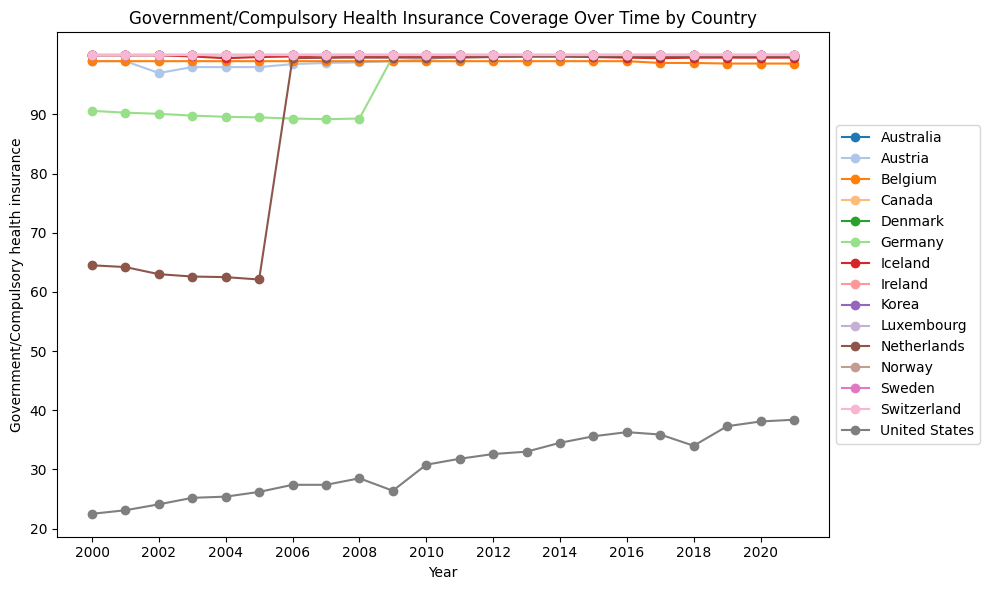

In [30]:
# Convert columns to integer type
pivoted_df['Year'] = pivoted_df['Year'].astype(int)
pivoted_df['Government/compulsory health insurance'] = pivoted_df['Government/compulsory health insurance'].astype(float)

# List of countries to plot
countries = pivoted_df['Country'].unique()

# Generate a colormap with a unique color for each country
color_cycle = cycle(plt.cm.tab20.colors)

# Plotting each country's data
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for idx, country in enumerate(countries):
    # Filter data for the current country
    country_data = pivoted_df[pivoted_df['Country'] == country]
    color = next(color_cycle)
    # Plot the data with a unique color for each country
    plt.plot(country_data['Year'], country_data['Government/compulsory health insurance'],
            label=country, color=color, marker='o')
    
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Government/Compulsory health insurance')
plt.title('Government/Compulsory Health Insurance Coverage Over Time by Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.yticks(np.arange(20, 100, 10))
plt.xticks(np.arange(2000, 2021, 2)) 

plt.tight_layout()
plt.savefig('../output/graphs/government_health_coverage.png')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/caitlinhartley/Desktop/Data_Boot_Camp/repos/output/graphs/primary_health_coverage.png'

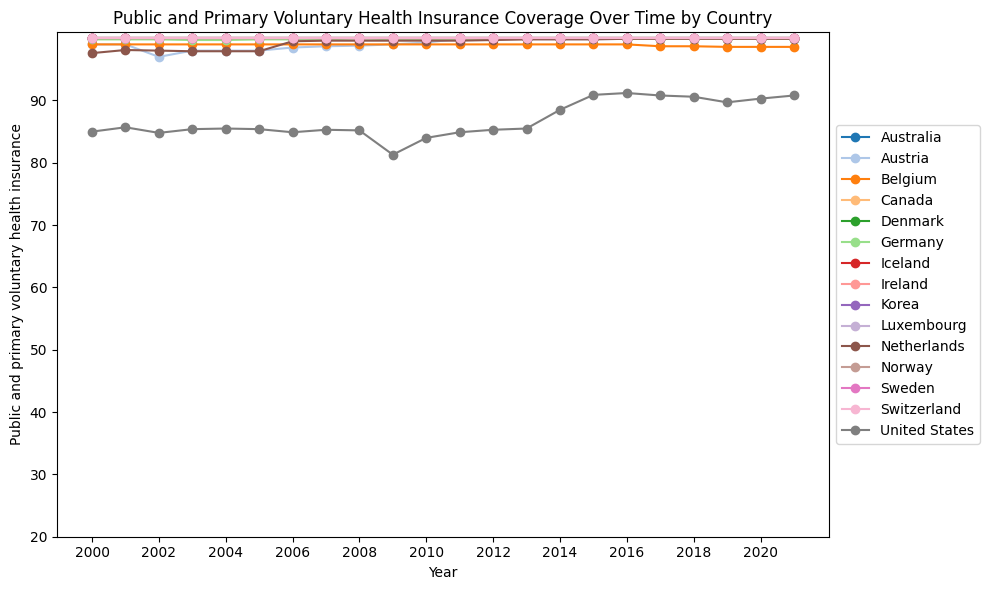

In [31]:
pivoted_df['Public and primary voluntary health insurance'] = pivoted_df['Public and primary voluntary health insurance'].astype(float)

# Generate a colormap with a unique color for each country
color_cycle = cycle(plt.cm.tab20.colors)

# Plotting each country's data
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for idx, country in enumerate(countries):
    # Filter data for the current country
    country_data = pivoted_df[pivoted_df['Country'] == country]
    color = next(color_cycle)
    # Plot the data with a unique color for each country
    plt.plot(country_data['Year'], country_data['Public and primary voluntary health insurance'],
            label=country, color=color, marker='o')
    
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Public and primary voluntary health insurance')
plt.title('Public and Primary Voluntary Health Insurance Coverage Over Time by Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.yticks(np.arange(20, 100, 10))
plt.xticks(np.arange(2000, 2021, 2)) 


plt.tight_layout()
plt.savefig('../output/graphs/primary_health_coverage.png')

plt.show()